# Assignment 1, Meenu Ravi, April 9 2021

In [1]:
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import matplotlib as mpl
import urllib.request

In [2]:
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Download data

In [3]:
datapath = os.path.join("datasets", "lifesat", "")
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

### Read data into pandas frames

In [4]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

### Explore data

In [5]:
oecd_bli.head(3)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN


In [6]:
oecd_bli = oecd_bli[oecd_bli.Indicator == "Life satisfaction"][oecd_bli.INEQUALITY == "TOT"][["Country", "Value"]]

<ipython-input-6-766d5ecb53c1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  oecd_bli = oecd_bli[oecd_bli.Indicator == "Life satisfaction"][oecd_bli.INEQUALITY == "TOT"][["Country", "Value"]]


In [7]:
oecd_bli = oecd_bli[oecd_bli.Country != "OECD - Total"]

In [8]:
oecd_bli.sort_values(by="Value", ascending=True, inplace=True)

In [9]:
oecd_bli.set_index("Country", inplace=True)
oecd_bli.head(3)

,Value
Country,
Greece,4.8
Hungary,4.9
Portugal,5.1


##### gdp_per_capita

In [10]:
gdp_per_capita.head(3)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0


In [11]:
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.head(3)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0


In [12]:
gdp_per_capita = gdp_per_capita[["Country", "GDP per capita"]]
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head(3)

,GDP per capita
Country,
Afghanistan,599.994
Albania,3995.383
Algeria,4318.135


In [13]:
gdp_per_capita.sort_values(by="GDP per capita", ascending=True, inplace=True)
gdp_per_capita.head(3)

,GDP per capita
Country,
South Sudan,220.860
Burundi,305.783
Central African Republic,334.870


## Merge tables

In [14]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)

In [15]:
full_country_stats.head(3)

,Value,GDP per capita
Country,,
Greece,4.8,18064.288
Hungary,4.9,12239.894
Portugal,5.1,19121.592


In [16]:
full_country_stats.rename(columns={"Value": "Life Satisfaction"}, inplace=True)
full_country_stats.head(3)

,Life Satisfaction,GDP per capita
Country,,
Greece,4.8,18064.288
Hungary,4.9,12239.894
Portugal,5.1,19121.592


# Extending Notebook 1 for Assignment 1 Question 1

## Question 1: Extend l1_n1.ipynb to try at least 3 more models that you can find in scikitlearn.

## Model 1: Training a Decision Tree Model

In [18]:
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split

In [19]:
X = np.c_[full_country_stats["GDP per capita"]]
y = np.c_[full_country_stats["Life Satisfaction"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [20]:
DTregressor = DecisionTreeRegressor(random_state = 0)
DTregressor.fit(X_train,y_train)
# pred=DT.predict(X_test)

DecisionTreeRegressor(random_state=0)

In [21]:
X_new = [[22587]]  # Cyprus' GDP per capita
print(DTregressor.predict(X_new))

[5.7]


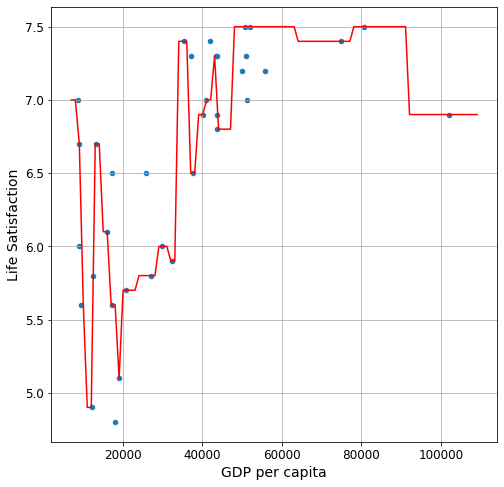

In [22]:
X_plot = np.arange(7_100, 110_000, 1000)
Y_plot = DTregressor.predict(X_plot.reshape(-1, 1))
full_country_stats.plot(x="GDP per capita", y="Life Satisfaction", kind='scatter', grid=True, figsize=(8,8))
plt.plot(X_plot, Y_plot, color='red')

## Model 2: Training a Random Forest Model

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
X = np.c_[full_country_stats["GDP per capita"]]
y = np.c_[full_country_stats["Life Satisfaction"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [25]:
RFregressor = RandomForestRegressor()
RFregressor.fit(X_train,np.ravel(y_train,order='C'))

RandomForestRegressor()

In [26]:
X_new = [[22587]]  # Cyprus' GDP per capita
print(RFregressor.predict(X_new))

[5.563]


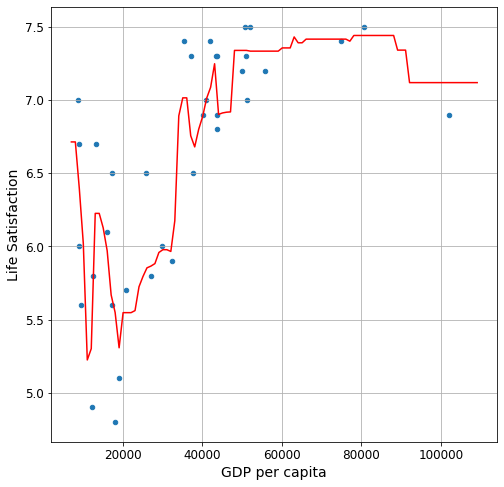

In [27]:
X_plot = np.arange(7_100, 110_000, 1000)
Y_plot = RFregressor.predict(X_plot.reshape(-1, 1))
full_country_stats.plot(x="GDP per capita", y="Life Satisfaction", kind='scatter', grid=True, figsize=(8,8))
plt.plot(X_plot, Y_plot, color='red')

## Model 3: Training a KNN model

In [28]:
from sklearn.neighbors import KNeighborsRegressor

In [29]:
X = np.c_[full_country_stats["GDP per capita"]]
y = np.c_[full_country_stats["Life Satisfaction"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [30]:
knnRegressor = KNeighborsRegressor(n_neighbors=2)
knnRegressor.fit(X, y)

KNeighborsRegressor(n_neighbors=2)

In [31]:
X_new = [[22587]]  # Cyprus' GDP per capita
print(knnRegressor.predict(X_new))

[[6.1]]


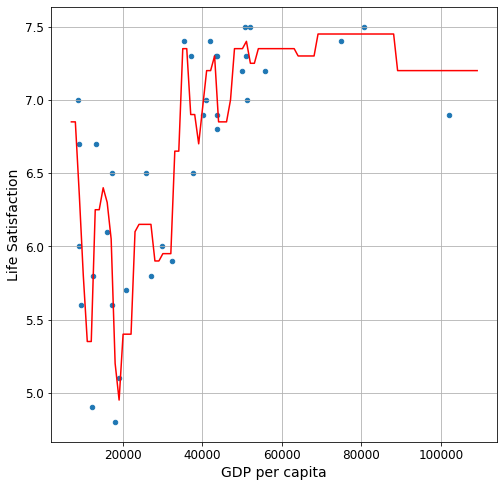

In [32]:
X_plot = np.arange(7_100, 110_000, 1000)
Y_plot = knnRegressor.predict(X_plot.reshape(-1, 1))
full_country_stats.plot(x="GDP per capita", y="Life Satisfaction", kind='scatter', grid=True, figsize=(8,8))
plt.plot(X_plot, Y_plot, color='red')